<center><h1>Yu-Chieh Chen</h3></center>
<center><h4>GitHub Username: ychen221</h4></center>
<br>

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC

from scipy.spatial.distance import cdist
from scipy.special import softmax
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score


In [2]:
file_path = "../data/wdbc.data"
df = pd.read_csv(file_path, header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Assuming 'df' is your DataFrame with 31 columns
df.columns = ['id', 'label'] + [f'feature_{i}' for i in range(1, 31)]

# Change the label to 0 or 1
df.replace({'M': 1, 'B': 0}, inplace = True)
df

,id,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming df is your DataFrame after loading the dataset
X = df.drop(['id', 'label'], axis=1)
y = df['label']

# Separate positive and negative classes
positive_indices = y[y == 1].index
negative_indices = y[y == 0].index

# Variables to store performance metrics for each run
# Initialize lists to store metrics
accuracy_train, precision_train, recall_train, f1_train, auc_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, f1_test, auc_test = [], [], [], [], []


# Perform Monte-Carlo Simulation M = 30 times
M = 30
for i in range(1, M+1):
    
    # Manually split the dataset to ensure 20% of both classes in the test set
    pos_train_indices, pos_test_indices = train_test_split(positive_indices, test_size=0.2, random_state=i)
    neg_train_indices, neg_test_indices = train_test_split(negative_indices, test_size=0.2, random_state=i)
    
    train_indices = np.concatenate([pos_train_indices, neg_train_indices])
    test_indices = np.concatenate([pos_test_indices, neg_test_indices])
    
    X_train, X_test = X.loc[train_indices], X.loc[test_indices]
    y_train, y_test = y.loc[train_indices], y.loc[test_indices]
    
    # Normalize the data: Fit on training data and transform both training and test data
    scaler = Normalizer()
    x_train_normalized = scaler.fit_transform(X_train)
    x_test_normalized = scaler.transform(X_test)

    # Initialize the LinearSVC model
    model = LinearSVC(penalty='l1', dual=False, tol=0.01, max_iter=10000)

    # GridSearchCV for optimizing the C parameter
    param_grid = {'C': np.logspace(-4, 8, 20)}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1_weighted', n_jobs = -1, verbose = 0)

    # Fit the model on the normalized training data
    grid_search.fit(x_train_normalized, y_train)

    # Evaluate performance on the training set
    y_train_pred = grid_search.predict(x_train_normalized)
    y_train_prob = grid_search.decision_function(x_train_normalized)
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
    classification_train = classification_report(y_train, y_train_pred, output_dict=True)
    
    train_score = accuracy_score(y_train, y_train_pred)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    auc_train.append(roc_auc_score(y_train, y_train_prob))
    auc_training = roc_auc_score(y_train, y_train_prob)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    
    
    # On test set
    y_test_pred = grid_search.predict(x_test_normalized)
    y_test_prob = grid_search.decision_function(x_test_normalized)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
    classification_test = classification_report(y_test, y_test_pred, output_dict=True)
    
    test_score = accuracy_score(y_test, y_test_pred)
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_test.append(f1_score(y_test, y_test_pred))
    auc_test.append(roc_auc_score(y_test, y_test_prob))
    auc_testing = roc_auc_score(y_test, y_test_prob)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    best_C = grid_search.best_params_['C']
    print(f"Iteration {i}: train accuracy: {train_score}, test accuracy: {test_score}, Best C = {best_C}")

# Calculate the average performance metrics
avg_metrics_train_supervised = {
    'Accuracy': np.mean(accuracy_train),
    'Precision': np.mean(precision_train),
    'Recall': np.mean(recall_train),
    'F1-Score': np.mean(f1_train),
    'AUC': np.mean(auc_train)
}

avg_metrics_test_supervised = {
    'Accuracy': np.mean(accuracy_test),
    'Precision': np.mean(precision_test),
    'Recall': np.mean(recall_test),
    'F1-Score': np.mean(f1_test),
    'AUC': np.mean(auc_test)
}


print(avg_metrics_train_supervised)
print(avg_metrics_test_supervised)


Iteration 1: train accuracy: 0.9713656387665198, test accuracy: 0.9739130434782609, Best C = 16237.767391887177
Iteration 2: train accuracy: 0.9779735682819384, test accuracy: 0.991304347826087, Best C = 69519.2796177559
Iteration 3: train accuracy: 0.9779735682819384, test accuracy: 0.9826086956521739, Best C = 69519.2796177559
Iteration 4: train accuracy: 0.9801762114537445, test accuracy: 0.9652173913043478, Best C = 100000000.0
Iteration 5: train accuracy: 0.986784140969163, test accuracy: 0.9739130434782609, Best C = 69519.2796177559
Iteration 6: train accuracy: 0.9801762114537445, test accuracy: 0.9478260869565217, Best C = 1274274.985703132
Iteration 7: train accuracy: 0.9757709251101322, test accuracy: 0.9826086956521739, Best C = 3792.690190732246
Iteration 8: train accuracy: 0.973568281938326, test accuracy: 0.9826086956521739, Best C = 1274274.985703132
Iteration 9: train accuracy: 0.9823788546255506, test accuracy: 0.9478260869565217, Best C = 297635.1441631313
Iteration 10

Confusion Matrix (Training):
[[284   1]
 [  6 163]]

ROC Area under curve (Training): 0.9979653275199833
Misclassification Rate (Training): 0.9845814977973568


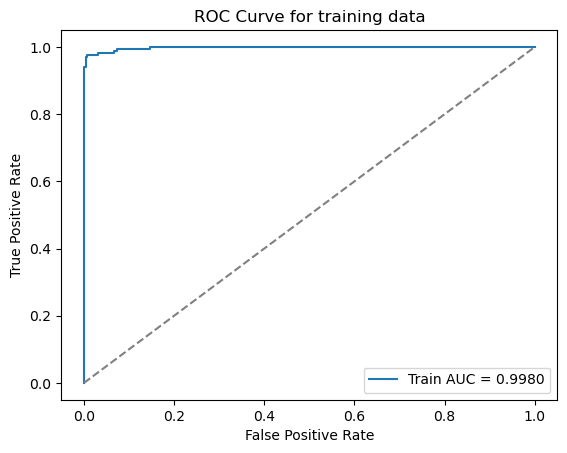

In [7]:
# Print the results
print("Confusion Matrix (Training):")
print(train_conf_matrix)
print("\nROC Area under curve (Training):", auc_training)
print("Misclassification Rate (Training):", train_score)
# Plot ROC AUC curve for training data
plt.plot(train_fpr, train_tpr, label=f'Train AUC = {auc_training:.4f}')
plt.title('ROC Curve for training data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


Confusion Matrix (Testing):
[[72  0]
 [ 4 39]]

ROC Area under curve (Testing): 0.9996770025839794
Misclassification Rate (Testing): 0.9652173913043478


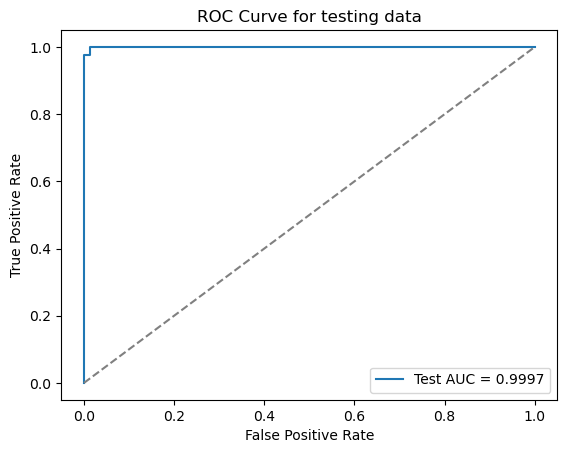

In [8]:
# Print the results
print("Confusion Matrix (Testing):")
print(test_conf_matrix)
print("\nROC Area under curve (Testing):", auc_testing)
print("Misclassification Rate (Testing):", test_score)
# Plot ROC AUC curve for training data
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {auc_testing:.4f}')
plt.title('ROC Curve for testing data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

##### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [39]:
# refer to Ghatgpt for help

def split_labeled_unlabeled(X, y, labeled_fraction=0.5):
    pos_indices = np.where(y == 1)[0]
    neg_indices = np.where(y == 0)[0]
    
    np.random.shuffle(pos_indices)
    np.random.shuffle(neg_indices)
    
    pos_labeled_size = int(len(pos_indices) * labeled_fraction)
    neg_labeled_size = int(len(neg_indices) * labeled_fraction)
    
    pos_labeled_indices = pos_indices[:pos_labeled_size]
    neg_labeled_indices = neg_indices[:neg_labeled_size]
    
    labeled_indices = np.concatenate([pos_labeled_indices, neg_labeled_indices])
    
    # Creating a boolean array for labeled and unlabeled data
    is_labeled = np.zeros(X.shape[0], dtype=bool)
    is_labeled[labeled_indices] = True
    
    # Splitting data using boolean indexing
    X_labeled = X[is_labeled]  #This line selects the rows from X where the corresponding value in is_labeled is True.
    y_labeled = y[is_labeled]
    X_unlabeled = X[~is_labeled]
    y_unlabeled = y[~is_labeled]
    
    return X_labeled, y_labeled, X_unlabeled, y_unlabeled


##### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(X_train)
x_test_normalized = scaler.transform(X_test)
    
X_labeled, y_labeled, X_unlabeled, y_unlabeled = split_labeled_unlabeled(x_train_normalized, y_train, labeled_fraction=0.5)

param_grid = {'C': np.logspace(-3, 8, 12)}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= i)
semi_model = LinearSVC(penalty='l1', dual=False, max_iter=10000, tol=0.01)
semi_grid_search = GridSearchCV(semi_model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=0)
semi_grid_search.fit(X_labeled, y_labeled)


distances = semi_grid_search.decision_function(X_unlabeled) #The decision_function method of the fitted model is used to compute the distance of the samples in X_unlabeled to the decision boundary.
farthest_index = np.argmax(np.abs(distances))
distances.shape
X_unlabeled[farthest_index]

array([ 1.95464524,  2.7315035 ,  1.88221409,  2.30904323, -0.11397059,
        0.1896529 ,  0.64263572,  1.00742963, -0.15748235, -0.89738562,
        3.25978607,  0.70385557,  2.90683345,  4.7130711 , -0.85965092,
       -0.60608702, -0.33354302, -0.39852127, -0.81082301, -0.55483911,
        3.43578241,  3.49972692,  3.26745995,  4.65022715,  0.34186751,
        0.03928675,  0.33132599,  0.77537725, -0.0769881 , -0.14436346])

In [58]:
from sklearn.preprocessing import StandardScaler
# Initialize lists to store metrics
accuracy_train, precision_train, recall_train, f1_train, auc_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, f1_test, auc_test = [], [], [], [], []

# Perform Monte-Carlo Simulation M = 30 times
M = 30
for i in range(1, M+1):
    
    scaler = StandardScaler()
    x_train_normalized = scaler.fit_transform(X_train)
    x_test_normalized = scaler.transform(X_test)
    
    X_labeled, y_labeled, X_unlabeled, y_unlabeled = split_labeled_unlabeled(x_train_normalized, y_train, labeled_fraction=0.5)
    
    param_grid = {'C': np.logspace(-3, 8, 12)}
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= i)
    semi_model = LinearSVC(penalty='l1', dual=False, max_iter=10000, tol=0.01)
    semi_grid_search = GridSearchCV(semi_model, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=0)
    semi_grid_search.fit(X_labeled, y_labeled)
    
    while len(X_unlabeled) > 0:
        # Select the point farthest from the decision boundary to pseudo-label
        distances = semi_grid_search.decision_function(X_unlabeled)
        farthest_index = np.argmax(np.abs(distances))
        
        # Update the labeled and unlabeled sets
        X_labeled = np.vstack([X_labeled, X_unlabeled[farthest_index].reshape(1, -1)])
        y_labeled = np.append(y_labeled, semi_grid_search.predict(X_unlabeled[farthest_index].reshape(1, -1)))
        
        X_unlabeled = np.delete(X_unlabeled, farthest_index, axis=0)
        
        # refit the SVC
        semi_grid_search.best_estimator_.fit(X_labeled, y_labeled)
        
    # Evaluate performance on the training set
    y_train_pred_semi = semi_grid_search.predict(x_train_normalized)
    y_train_prob_semi = semi_grid_search.decision_function(x_train_normalized)
    train_fpr_semi, train_tpr_semi, _ = roc_curve(y_train, y_train_prob_semi)
    classification_train_semi = classification_report(y_train, y_train_pred_semi, output_dict=True, zero_division=0)
    
    train_score_semi = accuracy_score(y_train, y_train_pred_semi)
    accuracy_train.append(accuracy_score(y_train, y_train_pred_semi))
    precision_train.append(precision_score(y_train, y_train_pred_semi))
    recall_train.append(recall_score(y_train, y_train_pred_semi))
    f1_train.append(f1_score(y_train, y_train_pred_semi))
    auc_train.append(roc_auc_score(y_train, y_train_prob_semi))
    auc_training_semi = roc_auc_score(y_train, y_train_prob_semi)
    train_conf_matrix_semi = confusion_matrix(y_train, y_train_pred_semi)
    
    # On test set
    y_test_pred_semi = semi_grid_search.predict(x_test_normalized)
    y_test_prob_semi = semi_grid_search.decision_function(x_test_normalized)
    test_fpr_semi, test_tpr_semi, _ = roc_curve(y_test, y_test_prob_semi)
    classification_test = classification_report(y_test, y_test_pred_semi, output_dict=True, zero_division=0)
    
    test_score_semi = accuracy_score(y_test, y_test_pred_semi)
    accuracy_test.append(accuracy_score(y_test, y_test_pred_semi))
    precision_test.append(precision_score(y_test, y_test_pred_semi))
    recall_test.append(recall_score(y_test, y_test_pred_semi))
    f1_test.append(f1_score(y_test, y_test_pred_semi))
    auc_test.append(roc_auc_score(y_test, y_test_prob_semi))
    auc_testing_semi = roc_auc_score(y_test, y_test_prob_semi)
    test_conf_matrix_semi = confusion_matrix(y_test, y_test_pred_semi)
    
        
    best_C_semi = semi_grid_search.best_params_['C']
    print(f"Iteration {i}: train accuracy: {train_score_semi}, test accuracy: {test_score_semi}, Best C = {best_C_semi}")
    
# Calculate the average performance metrics
avg_metrics_train_semi = {
    'Accuracy': np.mean(accuracy_train),
    'Precision': np.mean(precision_train),
    'Recall': np.mean(recall_train),
    'F1-Score': np.mean(f1_train),
    'AUC': np.mean(auc_train)
}

avg_metrics_test_semi = {
    'Accuracy': np.mean(accuracy_test),
    'Precision': np.mean(precision_test),
    'Recall': np.mean(recall_test),
    'F1-Score': np.mean(f1_test),
    'AUC': np.mean(auc_test)
}


print(avg_metrics_train_semi)
print(avg_metrics_test_semi)

Iteration 1: train accuracy: 0.9779735682819384, test accuracy: 0.9565217391304348, Best C = 10.0
Iteration 2: train accuracy: 0.9779735682819384, test accuracy: 0.9739130434782609, Best C = 100.0
Iteration 3: train accuracy: 0.9801762114537445, test accuracy: 0.9652173913043478, Best C = 1.0
Iteration 4: train accuracy: 0.9779735682819384, test accuracy: 0.9739130434782609, Best C = 0.1
Iteration 5: train accuracy: 0.9889867841409692, test accuracy: 0.9739130434782609, Best C = 100000.0
Iteration 6: train accuracy: 0.973568281938326, test accuracy: 0.9739130434782609, Best C = 0.1
Iteration 7: train accuracy: 0.9845814977973568, test accuracy: 0.9826086956521739, Best C = 0.1
Iteration 8: train accuracy: 0.9801762114537445, test accuracy: 0.9652173913043478, Best C = 0.1
Iteration 9: train accuracy: 0.9713656387665198, test accuracy: 0.9652173913043478, Best C = 0.1
Iteration 10: train accuracy: 0.9757709251101322, test accuracy: 0.991304347826087, Best C = 100000.0
Iteration 11: trai

Confusion Matrix (Training):
[[282   3]
 [  9 160]]

ROC Area under curve (Training): 0.9906986400913526
Misclassification Rate (Training): 0.973568281938326


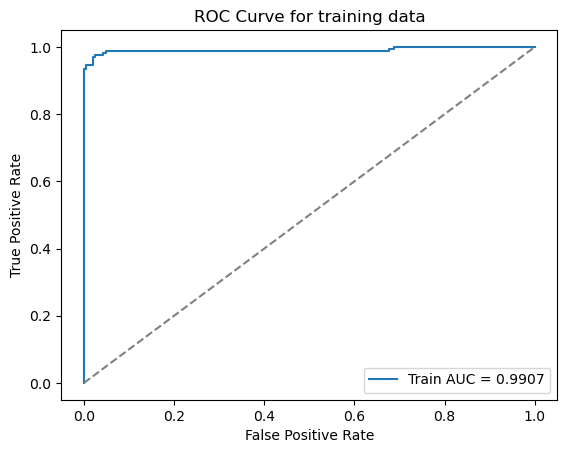

In [59]:
# Print the results
print("Confusion Matrix (Training):")
print(train_conf_matrix_semi)
print("\nROC Area under curve (Training):", auc_training_semi)
print("Misclassification Rate (Training):", train_score_semi)
# Plot ROC AUC curve for training data
plt.plot(train_fpr_semi, train_tpr_semi, label=f'Train AUC = {auc_training_semi:.4f}')
plt.title('ROC Curve for training data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


Confusion Matrix (Testing):
[[72  0]
 [ 2 41]]

ROC Area under curve (Testing): 0.998062015503876
Misclassification Rate (Testing): 0.9826086956521739


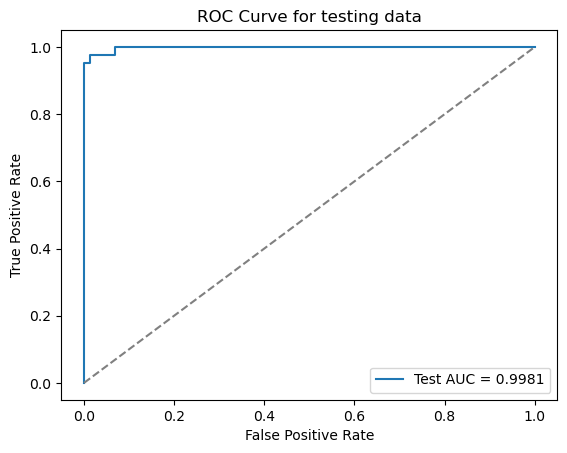

In [60]:
# Print the results
print("Confusion Matrix (Testing):")
print(test_conf_matrix_semi)
print("\nROC Area under curve (Testing):", auc_testing_semi)
print("Misclassification Rate (Testing):", test_score_semi)
# Plot ROC AUC curve for training data
plt.plot(test_fpr_semi, test_tpr_semi, label=f'Test AUC = {auc_testing_semi:.4f}')
plt.title('ROC Curve for testing data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

##### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

##### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

##### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

In [61]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax


# Initialize lists to store metrics
accuracy_train, precision_train, recall_train, f1_train, auc_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, f1_test, auc_test = [], [], [], [], []


# Perform Monte-Carlo Simulation M = 30 times
M = 30
n_clusters = 2
for i in range(1, M+1):

    pos_train_indices, pos_test_indices = train_test_split(positive_indices, test_size=0.2, random_state=i)
    neg_train_indices, neg_test_indices = train_test_split(negative_indices, test_size=0.2, random_state=i)
    
    train_indices = np.concatenate([pos_train_indices, neg_train_indices])
    test_indices = np.concatenate([pos_test_indices, neg_test_indices])
    
    X_train, X_test = X.loc[train_indices], X.loc[test_indices]
    y_train, y_test = y.loc[train_indices].reset_index(drop=True), y.loc[test_indices].reset_index(drop=True)

    scaler = StandardScaler()
    x_train_normalized = scaler.fit_transform(X_train)
    x_test_normalized = scaler.transform(X_test)
    
    # Run k-means
    kmeans = KMeans(n_clusters= 2, n_init= 20, random_state=i) #n_init is to avoid the local minima
    kmeans.fit(x_train_normalized)
    
   
    # training
    train_label = kmeans.predict(x_train_normalized)
    # refer to https://euanrussano.github.io/20190813kmeans/
    
    # Calculate distances from each data point to each cluster center
    distances_matrix = np.linalg.norm(x_train_normalized[:, np.newaxis] - kmeans.cluster_centers_, axis=2)
    # Extract distances to assigned cluster centers using 
    distance = distances_matrix[np.arange(x_train_normalized.shape[0]), train_label]
    # Calculate softmax probabilities of belonging to each cluster
    def softmax(x):
        # Compute the exponential of each element
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        # Divide each exp by the sum of exps across the specified axis
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    # Calculate the softmax of the negative distance matrix
    prob = softmax(-distances_matrix)

    # Convert the result to float64
    prob = prob.astype(np.float64)   
    predicted_labels = train_label[:]    
    label_cluster = np.zeros(2, dtype=int)
    # refer to https://stackoverflow.com/questions/46316091/extract-only-samples-which-belong-to-certain-kmeans-label
    for cluster in range(2):  
        # Find indices of samples belonging to the current cluster
        indices_in_cluster = np.where(kmeans.labels_ == cluster)[0]
        
        # Get the indices of the 30 closest samples 
        if len(indices_in_cluster) > 0:
            closest_indices = indices_in_cluster[np.argsort(distance[indices_in_cluster])[:30]]
            
            # Determine the majority label 
            if len(closest_indices) > 0:
                majority_label = pd.Series(y_train[closest_indices]).mode()[0]
                predicted_labels[indices_in_cluster] = majority_label
                label_cluster[majority_label] = cluster               
    positive = label_cluster[0]
    y_train_prob = np.take(prob, indices=positive, axis=1)   
    # Evaluate performance on the training set
    train_fpr_cluster, train_tpr_cluster, _ = roc_curve(y_train, y_train_prob, pos_label=0)
    classification_train_cluster = classification_report(y_train, predicted_labels, output_dict=True, zero_division=0)
    
    train_score_cluster = accuracy_score(y_train, predicted_labels)
    accuracy_train.append(accuracy_score(y_train, predicted_labels))
    precision_train.append(precision_score(y_train, predicted_labels, zero_division=0))
    recall_train.append(recall_score(y_train, predicted_labels))
    f1_train.append(f1_score(y_train, predicted_labels))
    auc_train.append(roc_auc_score(y_train, predicted_labels))
    auc_training_cluster = roc_auc_score(y_train, predicted_labels)
    train_conf_matrix_cluster = confusion_matrix(y_train, predicted_labels)
    
    
    #test
    test_label = kmeans.predict(x_test_normalized)
    # Calculate distances from each data point to each cluster center
    distances_matrix_t = np.linalg.norm(x_test_normalized[:, np.newaxis] - kmeans.cluster_centers_, axis=2)
    # Extract distances to assigned cluster centers using 
    distance_t = distances_matrix_t[np.arange(x_test_normalized.shape[0]), test_label]
    # Calculate softmax probabilities of belonging to each cluster
    
    # Calculate the softmax of the negative distance matrix
    prob_t = softmax(-distances_matrix_t)

    # Convert the result to float64
    prob_t = prob_t.astype(np.float64)
    predicted_labels_t = np.array(test_label)    
    label_cluster_t = np.zeros(2, dtype=int)
     
    for cluster in range(2):  
        # Find indices of samples belonging to the current cluster
        indices_in_cluster_t = np.where(test_label == cluster)[0]
        
        # Get the indices of the 30 closest samples to the cluster center
        if len(indices_in_cluster_t) > 0:
            closest_indices_t = indices_in_cluster_t[np.argsort(distance_t[indices_in_cluster_t])[:30]]
            
            # Determine the majority label among these 30 samples
            if len(closest_indices_t) > 0:
                majority_label_t = pd.Series(y_test[closest_indices_t]).mode()[0]
                predicted_labels_t[indices_in_cluster_t] = majority_label_t
                label_cluster_t[majority_label_t] = cluster
                
    positive_t = label_cluster_t[0]
    y_test_prob = np.take(prob_t, indices=positive_t, axis=1)   
    # Evaluate performance on the test set
    test_fpr_cluster, test_tpr_cluster, _ = roc_curve(y_test, y_test_prob, pos_label=0)
    classification_test_cluster = classification_report(y_test, predicted_labels_t, output_dict=True, zero_division=0)
    
    test_score_cluster = accuracy_score(y_test, predicted_labels_t)
    accuracy_test.append(accuracy_score(y_test, predicted_labels_t))
    precision_test.append(precision_score(y_test, predicted_labels_t, zero_division=0))
    recall_test.append(recall_score(y_test, predicted_labels_t))
    f1_test.append(f1_score(y_test, predicted_labels_t))
    auc_test.append(roc_auc_score(y_test, predicted_labels_t))
    auc_testing_cluster = roc_auc_score(y_test, predicted_labels_t)
    test_conf_matrix_cluster = confusion_matrix(y_test, predicted_labels_t)
       
    print(f"Iteration {i}: train accuracy: {train_score_cluster}, test accuracy: {test_score_cluster}")
    
# Calculate the average performance metrics
avg_metrics_train_cluster = {
    'Accuracy': np.mean(accuracy_train),
    'Precision': np.mean(precision_train),
    'Recall': np.mean(recall_train),
    'F1-Score': np.mean(f1_train),
    'AUC': np.mean(auc_train)
}

avg_metrics_test_cluster = {
    'Accuracy': np.mean(accuracy_test),
    'Precision': np.mean(precision_test),
    'Recall': np.mean(recall_test),
    'F1-Score': np.mean(f1_test),
    'AUC': np.mean(auc_test)
}


print(avg_metrics_train_cluster)
print(avg_metrics_test_cluster)

Iteration 1: train accuracy: 0.9295154185022027, test accuracy: 0.8434782608695652
Iteration 2: train accuracy: 0.9096916299559471, test accuracy: 0.8956521739130435
Iteration 3: train accuracy: 0.9030837004405287, test accuracy: 0.9217391304347826
Iteration 4: train accuracy: 0.8986784140969163, test accuracy: 0.9304347826086956
Iteration 5: train accuracy: 0.9096916299559471, test accuracy: 0.8956521739130435
Iteration 6: train accuracy: 0.9096916299559471, test accuracy: 0.8956521739130435
Iteration 7: train accuracy: 0.9096916299559471, test accuracy: 0.9130434782608695
Iteration 8: train accuracy: 0.9162995594713657, test accuracy: 0.9304347826086956
Iteration 9: train accuracy: 0.9074889867841409, test accuracy: 0.8782608695652174
Iteration 10: train accuracy: 0.9052863436123348, test accuracy: 0.9043478260869565
Iteration 11: train accuracy: 0.9052863436123348, test accuracy: 0.9130434782608695
Iteration 12: train accuracy: 0.9030837004405287, test accuracy: 0.9217391304347826
I

Confusion Matrix (Training):
[[277   8]
 [ 31 138]]

ROC Area under curve (Training): 0.8942489359493407
Misclassification Rate (Training): 0.9140969162995595


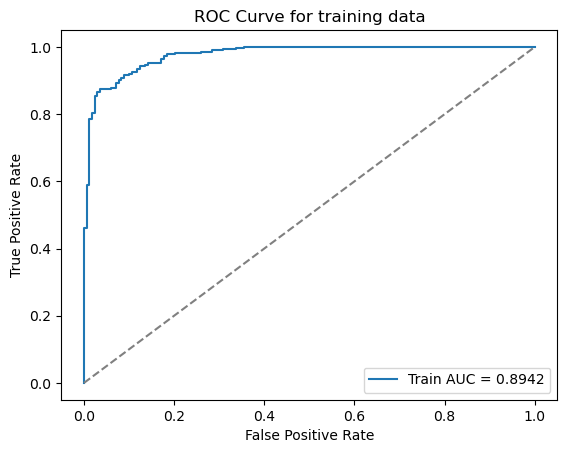

In [62]:
# Print the 30th run results
print("Confusion Matrix (Training):")
print(train_conf_matrix_cluster)
print("\nROC Area under curve (Training):", auc_training_cluster)
print("Misclassification Rate (Training):", train_score_cluster)
# Plot ROC AUC curve for training data
plt.plot(train_fpr_cluster, train_tpr_cluster, label=f'Train AUC = {auc_training_cluster:.4f}')
plt.title('ROC Curve for training data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


Confusion Matrix (Testing):
[[69  3]
 [ 6 37]]

ROC Area under curve (Testing): 0.9093992248062016
Misclassification Rate (Testing): 0.9217391304347826


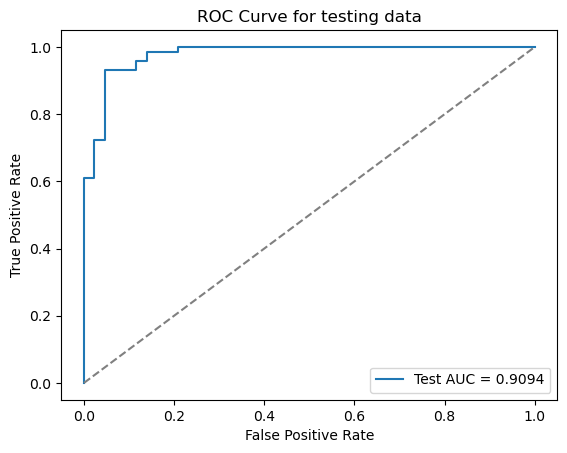

In [63]:
# Print the 30th run result
print("Confusion Matrix (Testing):")
print(test_conf_matrix_cluster)
print("\nROC Area under curve (Testing):", auc_testing_cluster)
print("Misclassification Rate (Testing):", test_score_cluster)
# Plot ROC AUC curve for training data
plt.plot(test_fpr_cluster, test_tpr_cluster, label=f'Test AUC = {auc_testing_cluster:.4f}')
plt.title('ROC Curve for testing data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


#### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [64]:
from sklearn.cluster import KMeans, SpectralClustering
from scipy.stats import mode
# Initialize lists to store metrics
accuracy_train, precision_train, recall_train, f1_train, auc_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, f1_test, auc_test = [], [], [], [], []


# Perform Monte-Carlo Simulation M = 30 times
M = 30
n_clusters = 2
for i in range(1, M+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Training the spectral clustering with train data
    spectral_train = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=i)
    train_labels = spectral_train.fit_predict(X_train_normalized)

    # Mapping clusters to actual class labels based on majority
    label_mapping = {}
    for k in range(n_clusters):
        mask = (train_labels == k)
        if np.any(mask):
            # Map the cluster label to the most frequent class label
            label_mapping[k] = y_train[mask].mode()[0]

    new_train_labels = np.array([label_mapping[label] for label in train_labels])

    # Applying the same mapping to test data
    spectral_test = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=i)
    test_labels = spectral_test.fit_predict(X_test_normalized)
    new_test_labels = np.array([label_mapping.get(label, np.random.choice([0, 1])) for label in test_labels])  # Random choice as a fallback

    
    # Evaluate performance on the training set
    train_fpr_cluster, train_tpr_cluster, _ = roc_curve(y_train, new_train_labels, pos_label=0)
    classification_train_cluster = classification_report(y_train, new_train_labels, output_dict=True, zero_division=0)
    
    train_score_cluster = accuracy_score(y_train, new_train_labels)
    accuracy_train.append(accuracy_score(y_train, new_train_labels))
    precision_train.append(precision_score(y_train, new_train_labels, zero_division=0))
    recall_train.append(recall_score(y_train, new_train_labels))
    f1_train.append(f1_score(y_train, new_train_labels))
    auc_train.append(roc_auc_score(y_train, new_train_labels))
    auc_training_cluster = roc_auc_score(y_train, new_train_labels)
    train_conf_matrix_cluster = confusion_matrix(y_train, new_train_labels)
    
    
    
      
    
    # Evaluate performance on the test set
    test_fpr_cluster, test_tpr_cluster, _ = roc_curve(y_test, new_test_labels, pos_label=0)
    classification_test_cluster = classification_report(y_test, new_test_labels, output_dict=True, zero_division=0)
    
    test_score_cluster = accuracy_score(y_test, new_test_labels)
    accuracy_test.append(accuracy_score(y_test, new_test_labels))
    precision_test.append(precision_score(y_test, new_test_labels, zero_division=0))
    recall_test.append(recall_score(y_test, new_test_labels))
    f1_test.append(f1_score(y_test, new_test_labels))
    auc_test.append(roc_auc_score(y_test, new_test_labels))
    auc_testing_cluster = roc_auc_score(y_test, new_test_labels)
    test_conf_matrix_cluster = confusion_matrix(y_test, new_test_labels)
       
    print(f"Iteration {i}: train accuracy: {train_score_cluster}, test accuracy: {test_score_cluster}")
    
# Calculate the average performance metrics
avg_metrics_train_s = {
    'Accuracy': np.mean(accuracy_train),
    'Precision': np.mean(precision_train),
    'Recall': np.mean(recall_train),
    'F1-Score': np.mean(f1_train),
    'AUC': np.mean(auc_train)
}

avg_metrics_test_s = {
    'Accuracy': np.mean(accuracy_test),
    'Precision': np.mean(precision_test),
    'Recall': np.mean(recall_test),
    'F1-Score': np.mean(f1_test),
    'AUC': np.mean(auc_test)
}


print(avg_metrics_train_s)
print(avg_metrics_test_s)

Iteration 1: train accuracy: 0.6285714285714286, test accuracy: 0.6403508771929824
Iteration 2: train accuracy: 0.6307692307692307, test accuracy: 0.6578947368421053
Iteration 3: train accuracy: 0.6285714285714286, test accuracy: 0.6403508771929824
Iteration 4: train accuracy: 0.6307692307692307, test accuracy: 0.6403508771929824
Iteration 5: train accuracy: 0.6307692307692307, test accuracy: 0.6140350877192983
Iteration 6: train accuracy: 0.6307692307692307, test accuracy: 0.6403508771929824
Iteration 7: train accuracy: 0.6307692307692307, test accuracy: 0.7105263157894737
Iteration 8: train accuracy: 0.6263736263736264, test accuracy: 0.631578947368421
Iteration 9: train accuracy: 0.6307692307692307, test accuracy: 0.6754385964912281
Iteration 10: train accuracy: 0.6263736263736264, test accuracy: 0.631578947368421
Iteration 11: train accuracy: 0.6263736263736264, test accuracy: 0.631578947368421
Iteration 12: train accuracy: 0.6307692307692307, test accuracy: 0.6052631578947368
Iter

Confusion Matrix (Training):
[[285   0]
 [169   1]]

ROC Area under curve (Training): 0.5029411764705882
Misclassification Rate (Training): 0.6285714285714286


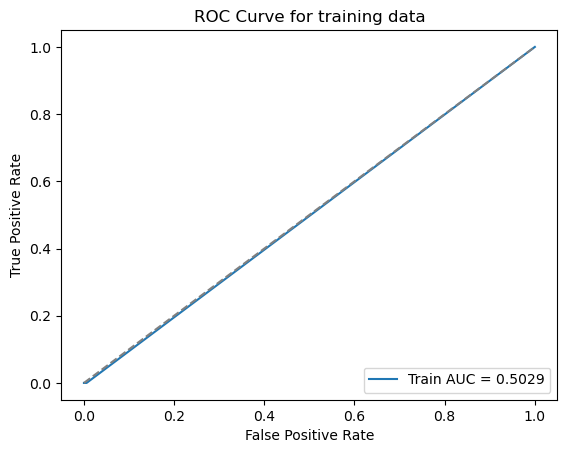

In [46]:
# Print the 30th run results
print("Confusion Matrix (Training):")
print(train_conf_matrix_cluster)
print("\nROC Area under curve (Training):", auc_training_cluster)
print("Misclassification Rate (Training):", train_score_cluster)
# Plot ROC AUC curve for training data
plt.plot(train_fpr_cluster, train_tpr_cluster, label=f'Train AUC = {auc_training_cluster:.4f}')
plt.title('ROC Curve for training data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


Confusion Matrix (Testing):
[[72  0]
 [41  1]]

ROC Area under curve (Testing): 0.5119047619047619
Misclassification Rate (Testing): 0.6403508771929824


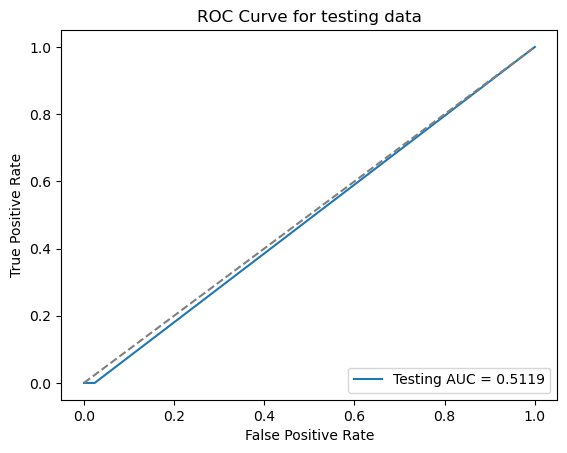

In [48]:
# Print the 30th run results
print("Confusion Matrix (Testing):")
print(test_conf_matrix_cluster)
print("\nROC Area under curve (Testing):", auc_testing_cluster)
print("Misclassification Rate (Testing):", test_score_cluster)
# Plot ROC AUC curve for training data
plt.plot(test_fpr_cluster, test_tpr_cluster, label=f'Testing AUC = {auc_testing_cluster:.4f}')
plt.title('ROC Curve for testing data')
plt.legend(loc = "lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Plot diagonal line 
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier')


In [65]:
print('Supervised:')
print(avg_metrics_train_supervised)
print(avg_metrics_test_supervised ,'\n')
print('Semi_supervised:')
print(avg_metrics_train_semi)
print(avg_metrics_test_semi ,'\n')
print('Kmeans Clustering:')
print(avg_metrics_train_cluster)
print(avg_metrics_test_cluster ,'\n')
print('Spectral Clustering:')
print(avg_metrics_train_s)
print(avg_metrics_test_s ,'\n')



Supervised:
{'Accuracy': 0.9800293685756242, 'Precision': 0.9856444716551793, 'Recall': 0.9603550295857989, 'F1-Score': 0.9728209516188938, 'AUC': 0.9981051247448007}
{'Accuracy': 0.967246376811594, 'Precision': 0.9690992466914192, 'Recall': 0.9434108527131781, 'F1-Score': 0.9554099540138336, 'AUC': 0.9922049956933681} 

Semi_supervised:
{'Accuracy': 0.9776798825256977, 'Precision': 0.9835690176613269, 'Recall': 0.9562130177514793, 'F1-Score': 0.9695854896802343, 'AUC': 0.994331983805668}
{'Accuracy': 0.9675362318840579, 'Precision': 0.9910132821108432, 'Recall': 0.9217054263565891, 'F1-Score': 0.9549352901371401, 'AUC': 0.9948535745047374} 

Kmeans Clustering:
{'Accuracy': 0.9091776798825257, 'Precision': 0.9219442589711917, 'Recall': 0.826429980276134, 'F1-Score': 0.8713556143048696, 'AUC': 0.892337797155611}
{'Accuracy': 0.9107246376811593, 'Precision': 0.9214959013208723, 'Recall': 0.8325581395348839, 'F1-Score': 0.8741230404114001, 'AUC': 0.8949827734711456} 

Spectral Clustering:

#### Comparison:
As we can see above, supervised learning has the highest accuracy rate and the highest F1-Score among all the models, and Spectral Clustering indeed underperformed.

### 2. Active Learning Using Support Vector Machines

#### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [66]:
path = '../data/data_banknote_authentication.txt'

banknote = pd.read_csv(path, header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

# Splitting the dataset into training and test sets
train_set, test_set = train_test_split(banknote, test_size=472, random_state=42)  # 472 data points for the test set


#### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

##### i.Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In [68]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

# Define parameters for the SVM and cross-validation
param_grid = {'C': np.logspace(-3, 3, 7)} 


# Repeating the process 50 times
n_repeats = 50
errors = []


for i in range(n_repeats): 
    training_set = resample(train_set, replace=False, n_samples=900, random_state=42+i)
    X_train = training_set.drop('class', axis=1)
    y_train = training_set['class']
    
    
    pool = pd.DataFrame()  
    indices_used = set()
    iteration_errors = []
    for j in range(91):
        new_indices = np.setdiff1d(X_train.index.values, list(indices_used))
        if len(new_indices) < 10:
            break  

        selected_indices = np.random.choice(new_indices, 10, replace=False)
        indices_used.update(selected_indices)

        pool = pd.concat([pool, X_train.loc[selected_indices]], axis=0)
        y_pool = y_train.loc[pool.index]

        svc_l1 = GridSearchCV(LinearSVC(penalty='l1', dual=False, random_state=j, tol=0.01, max_iter=10000),
                              param_grid, cv=StratifiedKFold(n_splits=3, random_state = j, shuffle = True ) , scoring='accuracy')
        svc_l1.fit(pool, y_pool)
        y_pred = svc_l1.best_estimator_.predict(test_set.drop('class', axis=1))
        test_error = 1 - accuracy_score(test_set['class'], y_pred)
        iteration_errors.append(test_error)
    
    test_error = np.mean(iteration_errors, axis =0)
    errors.append(iteration_errors)
    print(f"Iteration {i+1}: Test Errors: {test_error}")



Iteration 1: Test Errors: 0.01393596986817323
Iteration 2: Test Errors: 0.01407721280602634
Iteration 3: Test Errors: 0.014665725047080958
Iteration 4: Test Errors: 0.013606403013182646
Iteration 5: Test Errors: 0.012523540489642156
Iteration 6: Test Errors: 0.013206214689265508
Iteration 7: Test Errors: 0.01308851224105459
Iteration 8: Test Errors: 0.012970809792843666
Iteration 9: Test Errors: 0.013747645951035755
Iteration 10: Test Errors: 0.013818267419962312
Iteration 11: Test Errors: 0.012076271186440652
Iteration 12: Test Errors: 0.014406779661016925
Iteration 13: Test Errors: 0.01989171374764593
Iteration 14: Test Errors: 0.01782015065913369
Iteration 15: Test Errors: 0.015607344632768333
Iteration 16: Test Errors: 0.013653483992467021
Iteration 17: Test Errors: 0.023681732580037647
Iteration 18: Test Errors: 0.016807909604519753
Iteration 19: Test Errors: 0.01264124293785308
Iteration 20: Test Errors: 0.017255178907721255
Iteration 21: Test Errors: 0.013888888888888864
Iterati

##### ii. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [69]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, hinge_loss
from sklearn.utils import resample


param_grid = {'C': np.logspace(-3, 3, 6)}  
cv = 5  

errors_active = []  # To store test errors for each SVM trained

for i in range(50): 
    training_set = resample(train_set, replace=False, n_samples=900, random_state=42+i)
    X_train = training_set.drop('class', axis=1)
    y_train = training_set['class']
  
    
    initial_indices = np.random.choice(X_train.index, 10, replace=False)
    train_indices = set(initial_indices)
    
    iteration_errors_a = []
    for j in range(90):  
        # Prepare the current training set
        X_train_sub = X_train.loc[list(train_indices)]
        y_train_sub = y_train.loc[list(train_indices)]

        # Train SVM with GridSearchCV
        svm = GridSearchCV(LinearSVC(penalty='l1', dual=False, random_state=j, tol=0.01, max_iter=10000), param_grid, cv=StratifiedKFold(n_splits=5, random_state = j, shuffle = True ))
        svm.fit(X_train_sub, y_train_sub)

        # Calculate test error
        y_pred = svm.best_estimator_.predict(test_set.drop('class', axis=1))
        test_error = 1 - accuracy_score(test_set['class'], y_pred)
        iteration_errors_a.append(test_error)

        # Find the 10 closest points to the hyperplane
        distances = np.abs(svm.decision_function(X_train))
        closest_indices = np.argsort(distances)[:10]

        # Update the train_indices to include these new points
        train_indices.update(X_train.iloc[closest_indices].index)
    
    test_error = np.mean(iteration_errors_a, axis =0)
    errors_active.append(iteration_errors_a)
    print(f"Iteration {i+1}: Test Errors: {test_error}")



Iteration 1: Test Errors: 0.012570621468926528
Iteration 2: Test Errors: 0.013582862523540457
Iteration 3: Test Errors: 0.013983050847457594
Iteration 4: Test Errors: 0.012570621468926528
Iteration 5: Test Errors: 0.008192090395480208
Iteration 6: Test Errors: 0.009392655367231622
Iteration 7: Test Errors: 0.01280602636534837
Iteration 8: Test Errors: 0.01650188323917135
Iteration 9: Test Errors: 0.013888888888888864
Iteration 10: Test Errors: 0.01723163841807907
Iteration 11: Test Errors: 0.014147834274952892
Iteration 12: Test Errors: 0.010993408662900161
Iteration 13: Test Errors: 0.015277777777777748
Iteration 14: Test Errors: 0.013677024482109197
Iteration 15: Test Errors: 0.01372410546139357
Iteration 16: Test Errors: 0.008356873822975501
Iteration 17: Test Errors: 0.01214689265536721
Iteration 18: Test Errors: 0.014595103578154396
Iteration 19: Test Errors: 0.009416195856873803
Iteration 20: Test Errors: 0.013276836158192055
Iteration 21: Test Errors: 0.012429378531073423
Iterat

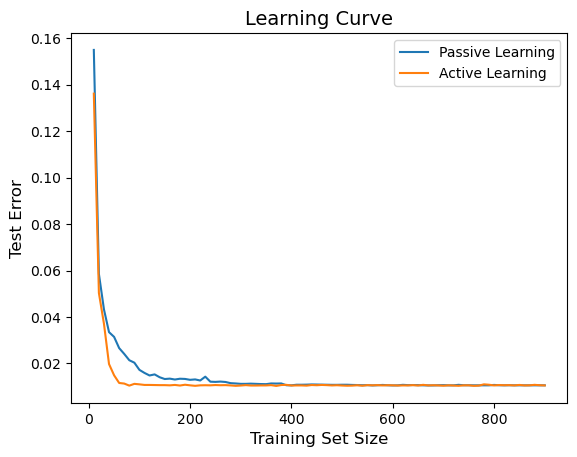

In [70]:
from statistics import mean

# Calculate means using map and statistics.mean
passive_mean_errors = list(map(mean, zip(*errors)))
active_mean_errors = list(map(mean, zip(*errors_active)))



training_sizes = [i for i in range(10, 910, 10)]
                  
plt.plot(training_sizes, passive_mean_errors, label = 'Passive Learning')
plt.plot(training_sizes, active_mean_errors, label = 'Active Learning')
# Set the title and labels with an increased font size for better readability
plt.title("Learning Curve", fontsize=14)
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Test Error", fontsize=12)
plt.legend()

### Reference
1. KMeans Clustering in Python step by step: https://euanrussano.github.io/20190813kmeans/
2. Extract only samples which belong to certain kmeans label: https://stackoverflow.com/questions/46316091/extract-only-samples-which-belong-to-certain-kmeans-label
3. Softmax Activation Function: Everything You Need to Know: https://www.pinecone.io/learn/softmax-activation/
4. sklearn.cluster.SpectralClustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
5. ChatGPT
6. Getting distance to the hyperplane from sklearn's svm.svc: https://stackoverflow.com/questions/44143421/getting-distance-to-the-hyperplane-from-sklearns-svm-svc